In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

In [2]:
adata = sc.read_10x_h5(
    filename="ZB4171/Xenium_V1_FFPE_TgCRND8_2_5_months_outs/cell_feature_matrix.h5"
)

In [3]:
adata

AnnData object with n_obs × n_vars = 53913 × 347
    var: 'gene_ids', 'feature_types', 'genome'

In [4]:
df = pd.read_csv(
    "ZB4171/Xenium_V1_FFPE_TgCRND8_2_5_months_outs/cells.csv.gz", compression="gzip"
)

In [5]:
df

cell_id   x_centroid   y_centroid  transcript_counts  \
0      aaabfoap-1   843.688242   608.298163                 83   
1      aaabonpk-1   851.089270   612.555530                156   
2      aaadnjke-1   833.557346   611.501331                204   
3      aaaeilha-1   840.111331   616.144528                 30   
4      aaaenhoh-1   824.709283   622.894101                225   
...           ...          ...          ...                ...   
53908  oigkoklj-1  2700.507068  4313.612622                319   
53909  oigloohc-1  2699.408459  4257.009180                158   
53910  oigmajpm-1  2708.686450  4255.594727                 81   
53911  oignbodm-1  2720.747693  4257.916455                243   
53912  oignloic-1  2724.624573  4307.631909                256   

       control_probe_counts  control_codeword_counts  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   
...                     ...                      ...   
53908                     0                        0   
53909                     0                        0   
53910                     0                        0   
53911                     0                        0   
53912                     0                        0   

       unassigned_codeword_counts  total_counts   cell_area  nucleus_area  
0                               0            83   87.919219     31.790000  
1                               0           156  161.252969     42.717813  
2                               0           204  129.824219     48.452656  
3                               0            30   37.479687     13.862969  
4                               0           225  192.636562     21.087969  
...                           ...           ...         ...           ...  
53908                           0           319  942.501250     63.760625  
53909                           0           158  396.562187     20.004219  
53910                           0            81  149.331719     10.566562  
53911                           2           245  650.069375     44.704687  
53912                           1           257  795.878906     69.043906  

[53913 rows x 10 columns]

In [6]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()

In [7]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [8]:
adata.obs

cell_id   x_centroid   y_centroid  transcript_counts  \
aaabfoap-1  aaabfoap-1   843.688242   608.298163                 83   
aaabonpk-1  aaabonpk-1   851.089270   612.555530                156   
aaadnjke-1  aaadnjke-1   833.557346   611.501331                204   
aaaeilha-1  aaaeilha-1   840.111331   616.144528                 30   
aaaenhoh-1  aaaenhoh-1   824.709283   622.894101                225   
...                ...          ...          ...                ...   
oigkoklj-1  oigkoklj-1  2700.507068  4313.612622                319   
oigloohc-1  oigloohc-1  2699.408459  4257.009180                158   
oigmajpm-1  oigmajpm-1  2708.686450  4255.594727                 81   
oignbodm-1  oignbodm-1  2720.747693  4257.916455                243   
oignloic-1  oignloic-1  2724.624573  4307.631909                256   

            control_probe_counts  control_codeword_counts  \
aaabfoap-1                     0                        0   
aaabonpk-1                     0                        0   
aaadnjke-1                     0                        0   
aaaeilha-1                     0                        0   
aaaenhoh-1                     0                        0   
...                          ...                      ...   
oigkoklj-1                     0                        0   
oigloohc-1                     0                        0   
oigmajpm-1                     0                        0   
oignbodm-1                     0                        0   
oignloic-1                     0                        0   

            unassigned_codeword_counts  total_counts   cell_area  nucleus_area  
aaabfoap-1                           0            83   87.919219     31.790000  
aaabonpk-1                           0           156  161.252969     42.717813  
aaadnjke-1                           0           204  129.824219     48.452656  
aaaeilha-1                           0            30   37.479687     13.862969  
aaaenhoh-1                           0           225  192.636562     21.087969  
...                                ...           ...         ...           ...  
oigkoklj-1                           0           319  942.501250     63.760625  
oigloohc-1                           0           158  396.562187     20.004219  
oigmajpm-1                           0            81  149.331719     10.566562  
oignbodm-1                           2           245  650.069375     44.704687  
oignloic-1                           1           257  795.878906     69.043906  

[53913 rows x 10 columns]

In [9]:
adata.to_df()

2010300C02Rik  Abca7  Acsbg1  Acta2  Acvrl1  Adamts2  Adamtsl1  \
aaabfoap-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   
aaabonpk-1            1.0    0.0     0.0    0.0     0.0      0.0       0.0   
aaadnjke-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   
aaaeilha-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   
aaaenhoh-1            0.0    0.0     1.0    3.0     0.0      0.0       0.0   
...                   ...    ...     ...    ...     ...      ...       ...   
oigkoklj-1            0.0    0.0     0.0    1.0     2.0      0.0       0.0   
oigloohc-1            0.0    0.0     1.0    0.0     0.0      0.0       0.0   
oigmajpm-1            0.0    0.0     1.0    0.0     0.0      0.0       0.0   
oignbodm-1            0.0    0.0     2.0    1.0     1.0      0.0       0.0   
oignloic-1            0.0    0.0     0.0    0.0     3.0      1.0       0.0   

            Adgrl4  Aldh1a2  Aldh1l1  ...  Unc13c  Vat1l  Vcan  Vim  Vip  \
aaabfoap-1     0.0      0.0      0.0  ...     0.0    5.0   0.0  0.0  0.0   
aaabonpk-1     0.0      0.0      0.0  ...     0.0    4.0   0.0  0.0  0.0   
aaadnjke-1     0.0      1.0      0.0  ...     0.0    5.0   0.0  0.0  0.0   
aaaeilha-1     0.0      1.0      0.0  ...     0.0    0.0   0.0  1.0  0.0   
aaaenhoh-1     0.0      0.0      0.0  ...     0.0    2.0   0.0  0.0  0.0   
...            ...      ...      ...  ...     ...    ...   ...  ...  ...   
oigkoklj-1    10.0      3.0      0.0  ...     0.0    0.0   0.0  7.0  0.0   
oigloohc-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  3.0  0.0   
oigmajpm-1     1.0      0.0      1.0  ...     0.0    0.0   0.0  1.0  0.0   
oignbodm-1     3.0      0.0      0.0  ...     0.0    0.0   0.0  2.0  0.0   
oignloic-1     6.0      2.0      0.0  ...     0.0    0.0   0.0  0.0  0.0   

            Vwc2l  Wfs1  Zfp366  Zfp536  Zfpm2  
aaabfoap-1    0.0   1.0     0.0     0.0    0.0  
aaabonpk-1    0.0   0.0     0.0     0.0    0.0  
aaadnjke-1    0.0   3.0     0.0     0.0    0.0  
aaaeilha-1    0.0   1.0     0.0     0.0    0.0  
aaaenhoh-1    0.0   0.0     0.0     0.0    0.0  
...           ...   ...     ...     ...    ...  
oigkoklj-1    0.0   0.0     0.0     0.0    0.0  
oigloohc-1    0.0   0.0     0.0     0.0    0.0  
oigmajpm-1    0.0   0.0     0.0     0.0    0.0  
oignbodm-1    0.0   0.0     0.0     0.0    0.0  
oignloic-1    0.0   1.0     1.0     1.0    0.0  

[53913 rows x 347 columns]

**Quality Control**

In [10]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [11]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.0068088462543454045
Negative decoding count % : 0.004780679284965923


C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

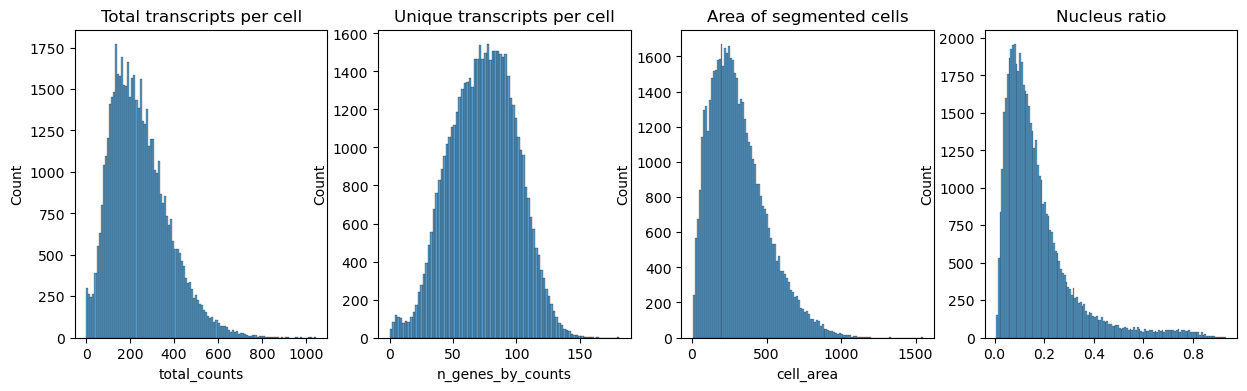

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

In [13]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [14]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
sc.tl.leiden(adata, resolution=0.8, key_added='leiden_08')

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


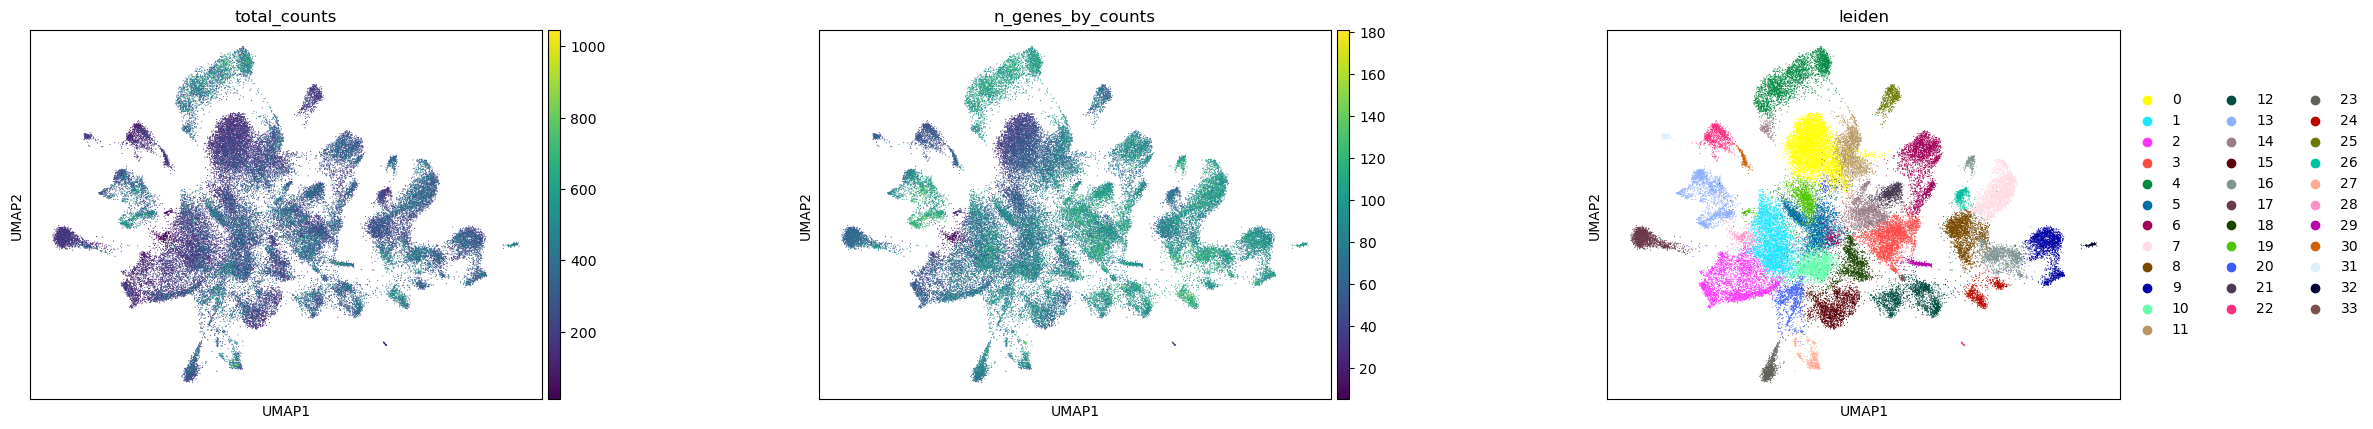

In [15]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Acer\anaconda3\envs\f

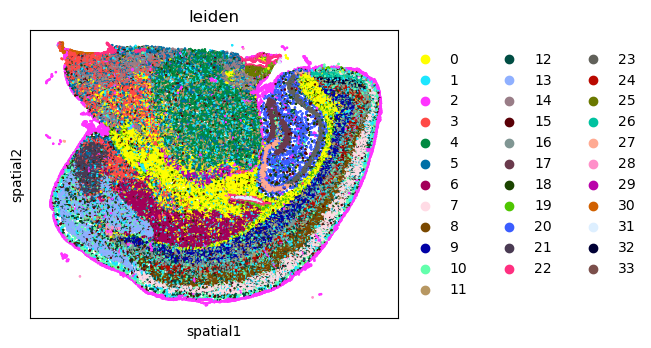

In [16]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


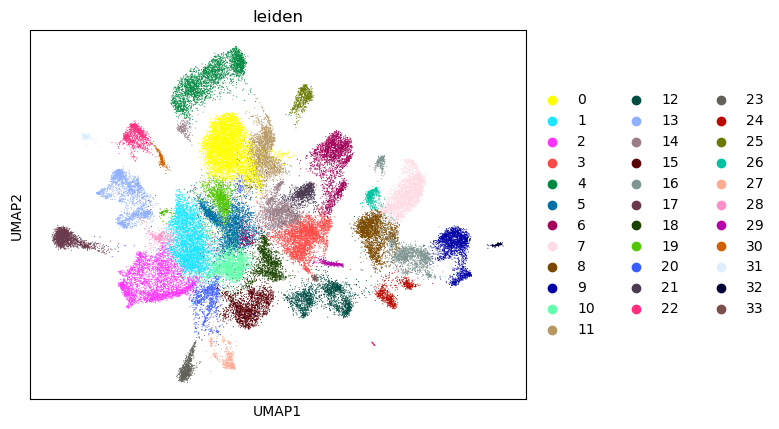

In [17]:
sc.pl.umap(
    adata,
    color=[
        "leiden"
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


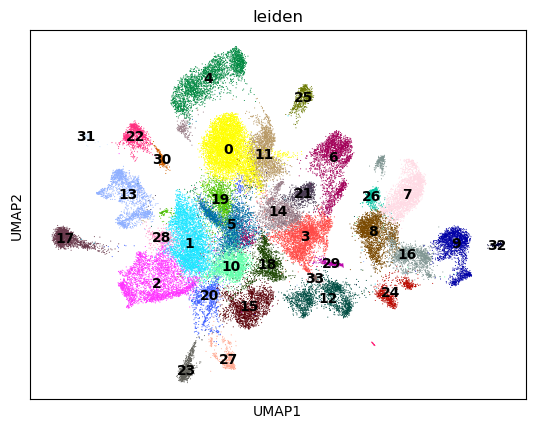

In [18]:
sc.pl.umap(
    adata,
    color=[
        "leiden"],
    legend_loc='on data',
    wspace=0.4,
)

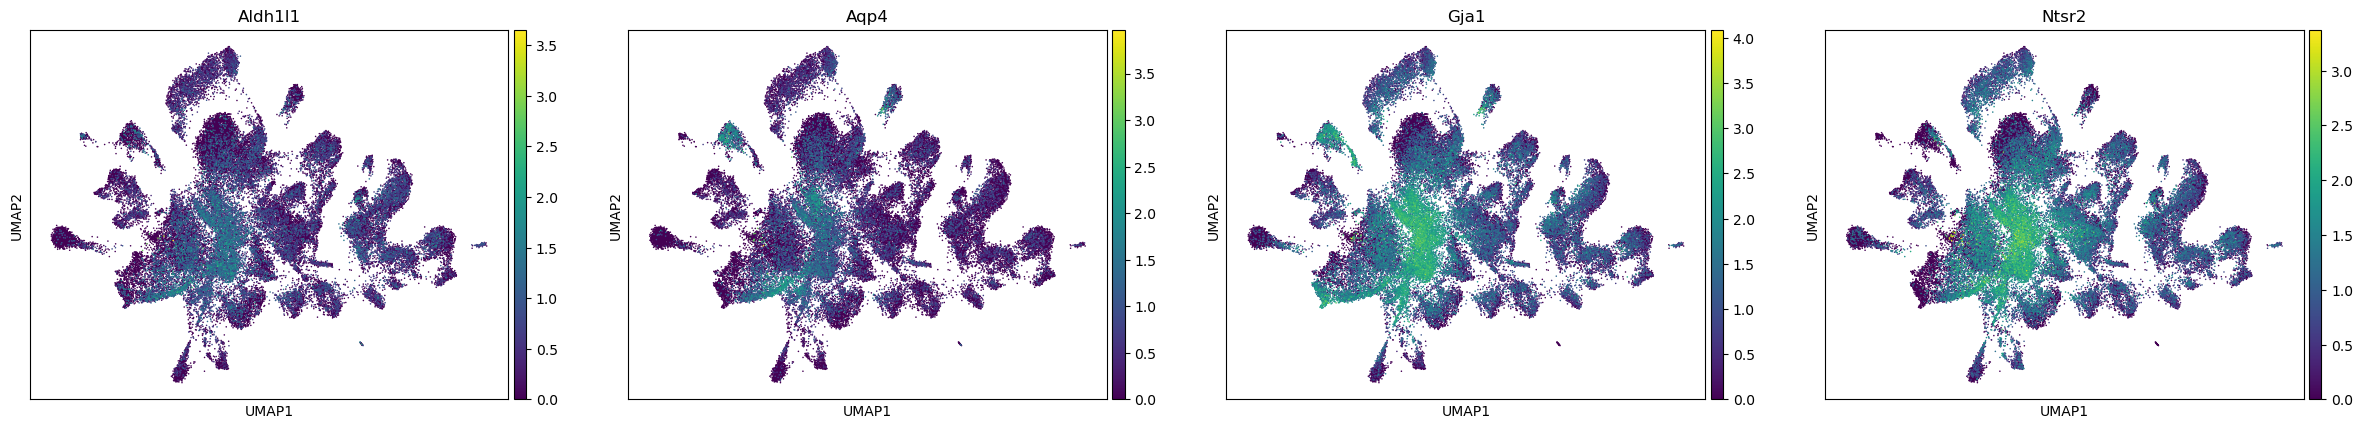

In [19]:
#Astrocytes
sc.pl.umap(adata,
           color=["Aldh1l1", "Aqp4", "Gja1", "Ntsr2"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

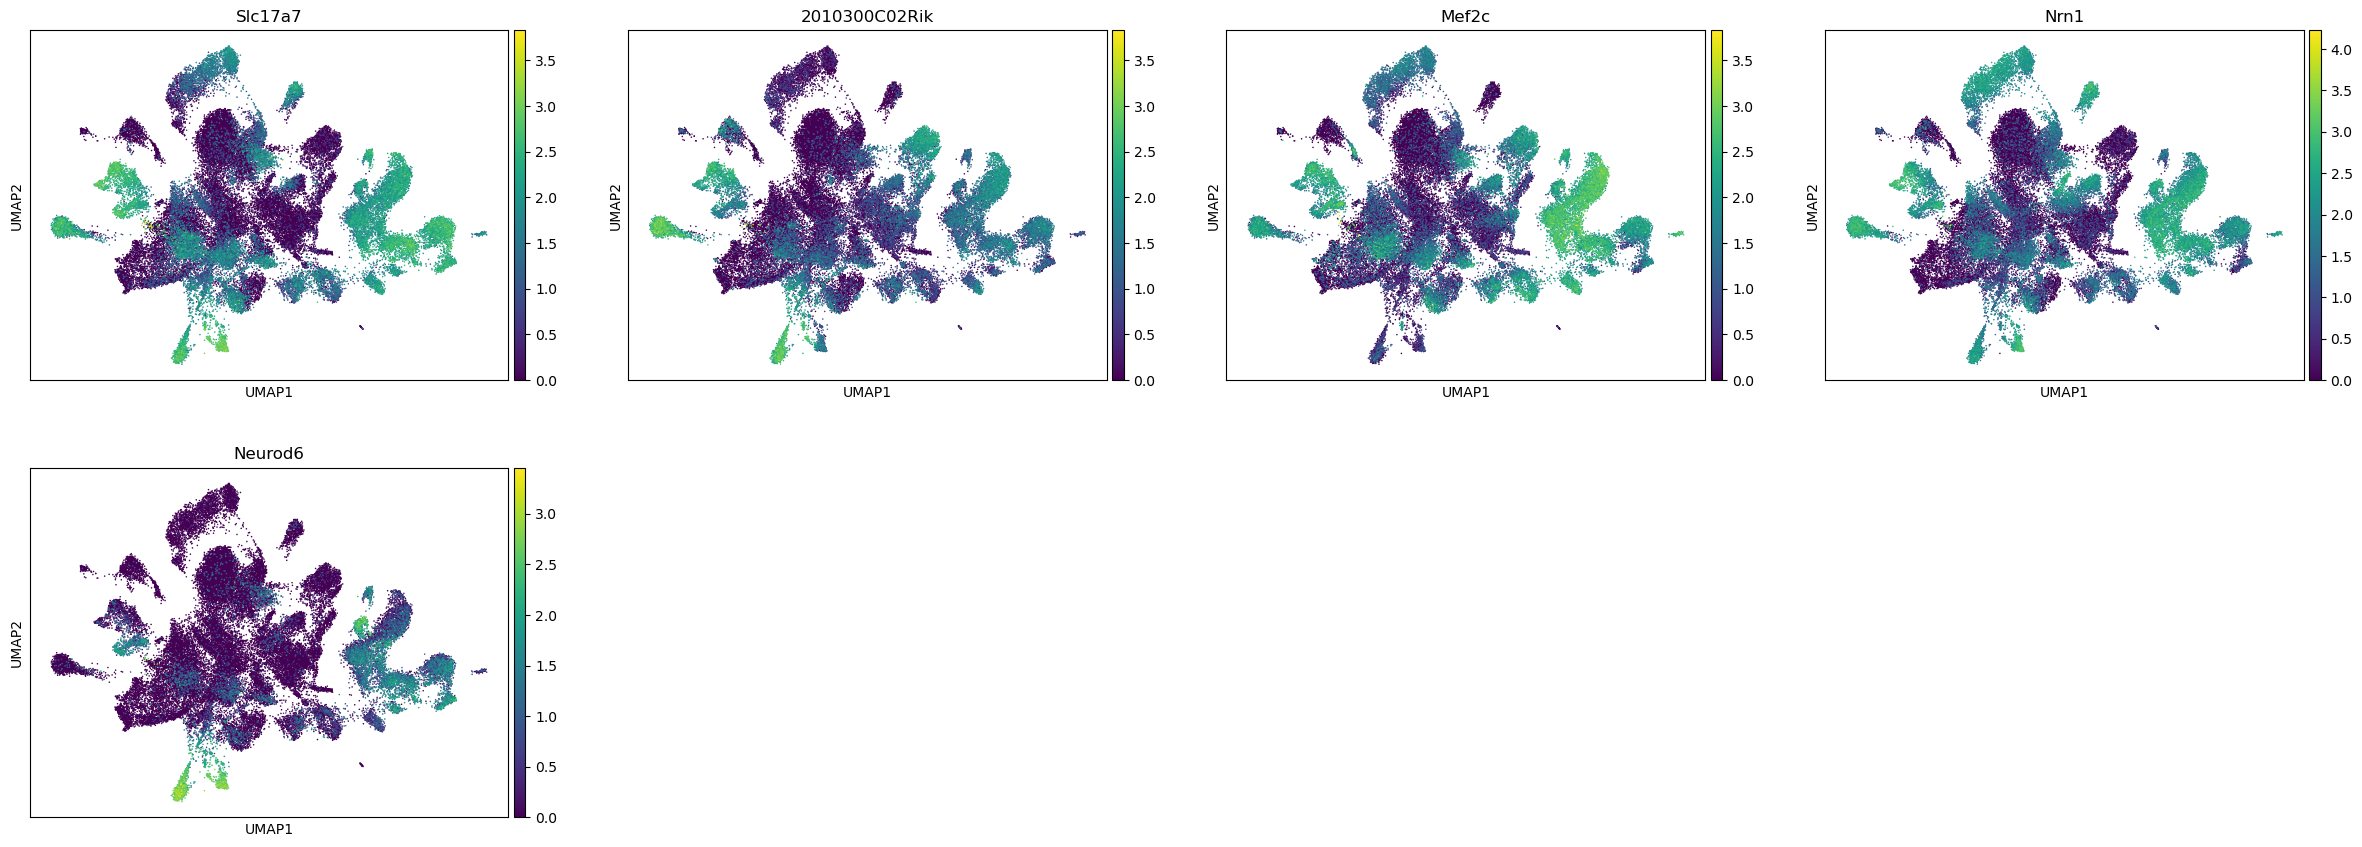

In [20]:
#Excitory Neurons
sc.pl.umap(adata,
           color=["Slc17a7", "2010300C02Rik", "Mef2c", "Nrn1", "Neurod6"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

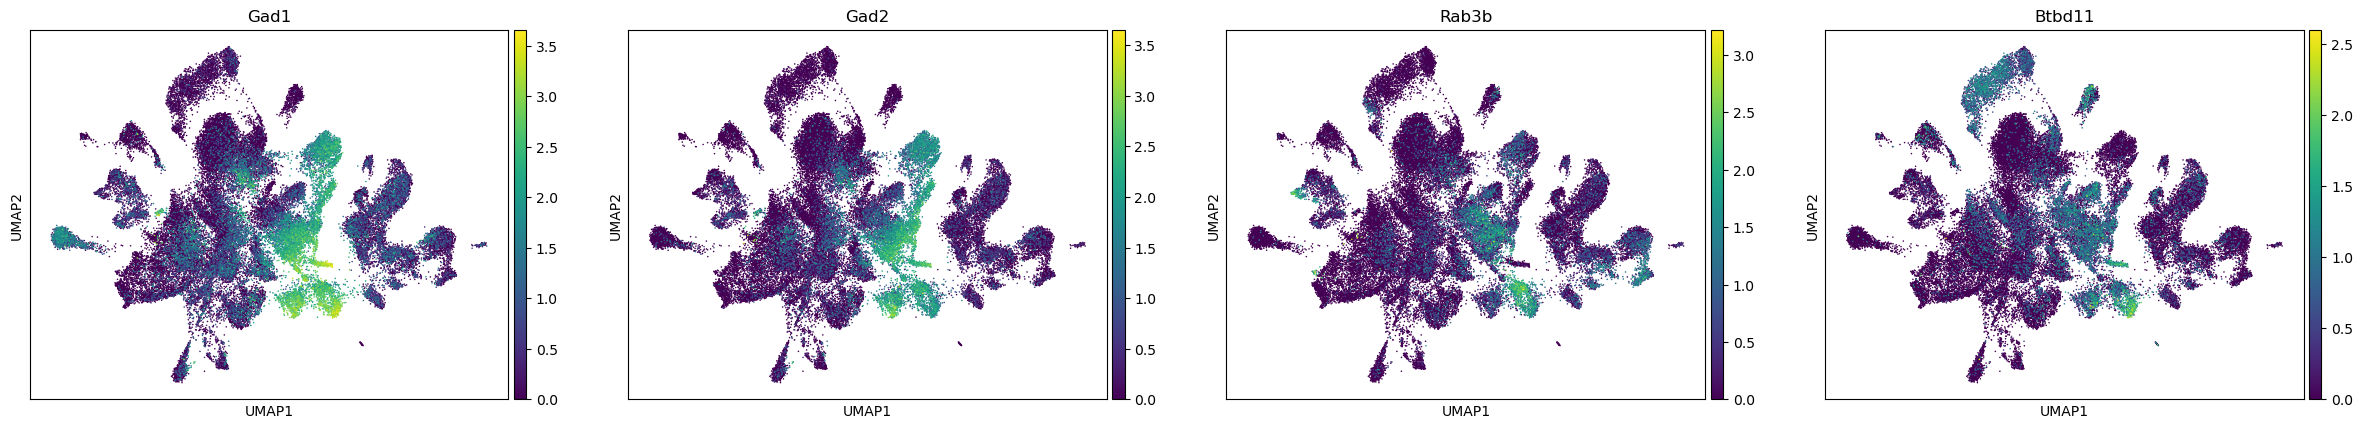

In [21]:
#Inhibitory Neurons
sc.pl.umap(adata,
           color=["Gad1", "Gad2", "Rab3b", "Btbd11"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

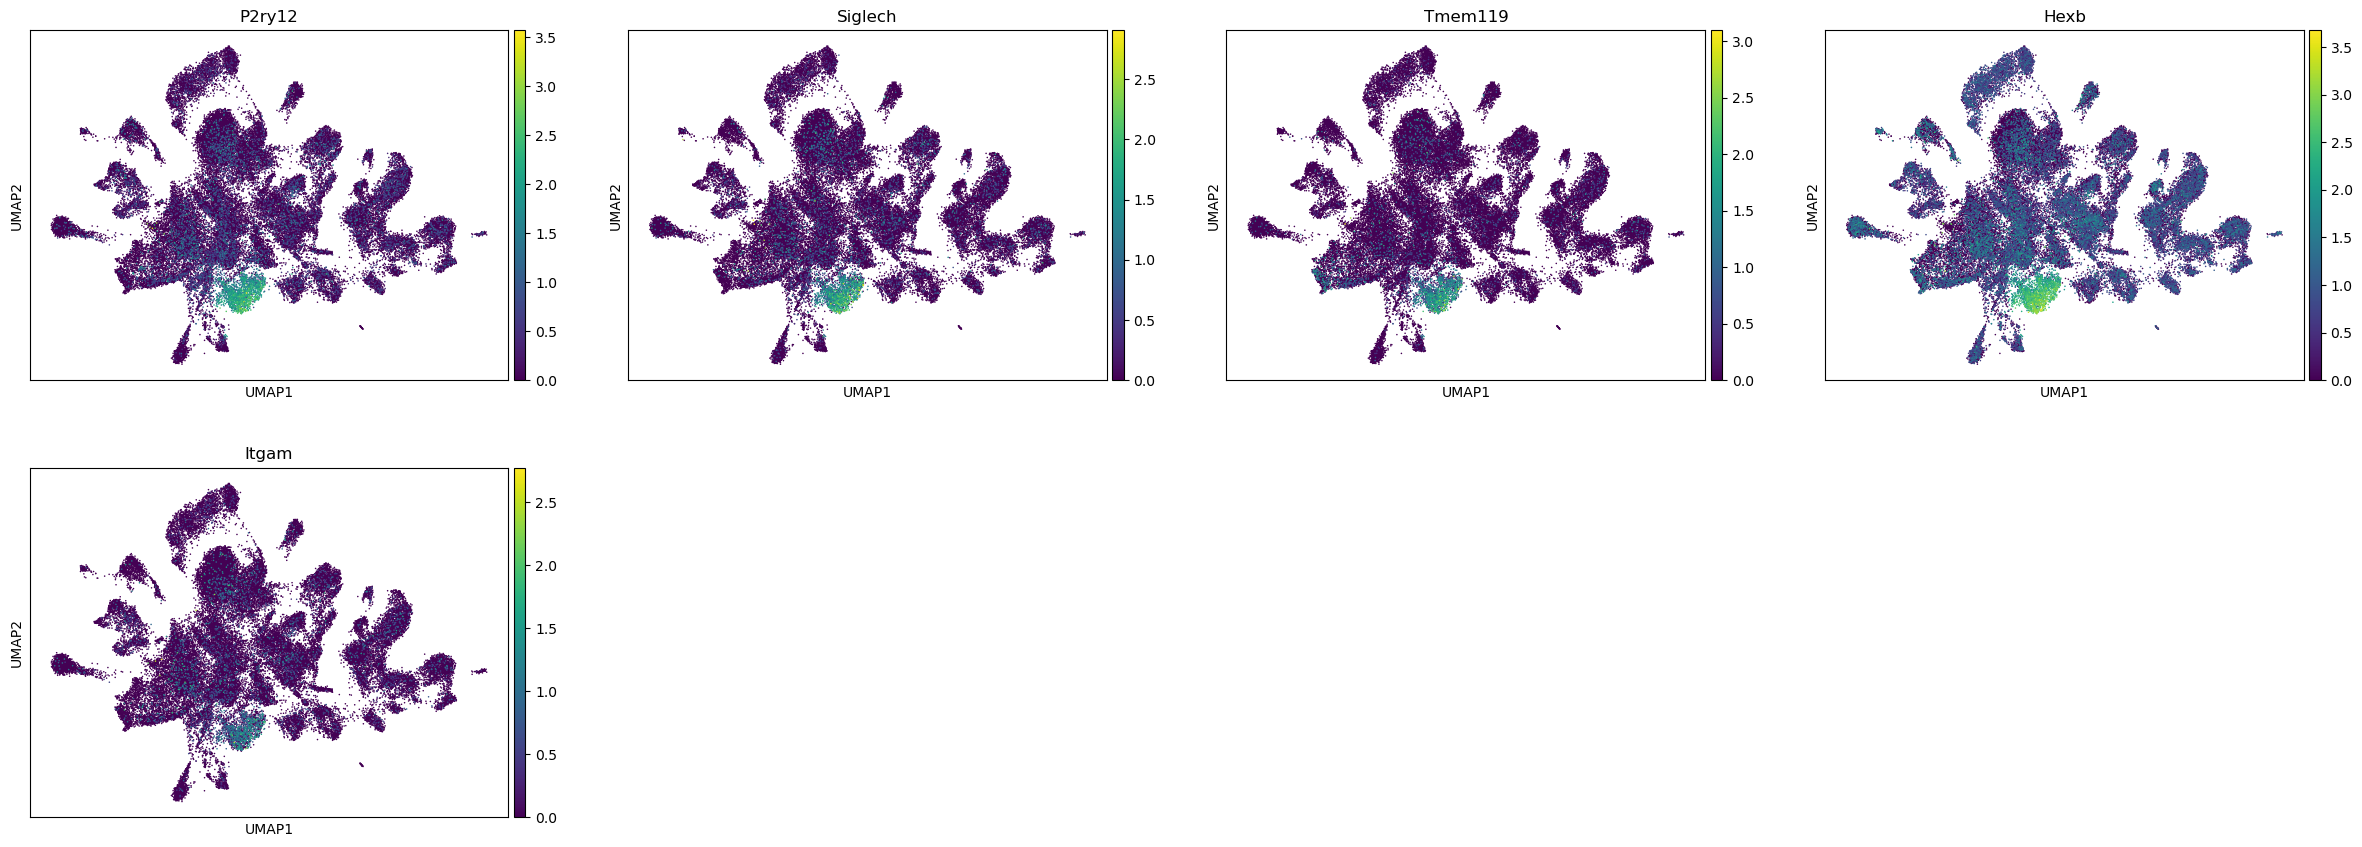

In [22]:
#Microglia
sc.pl.umap(adata,
           color=["P2ry12", "Siglech", "Tmem119", "Hexb", "Itgam"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

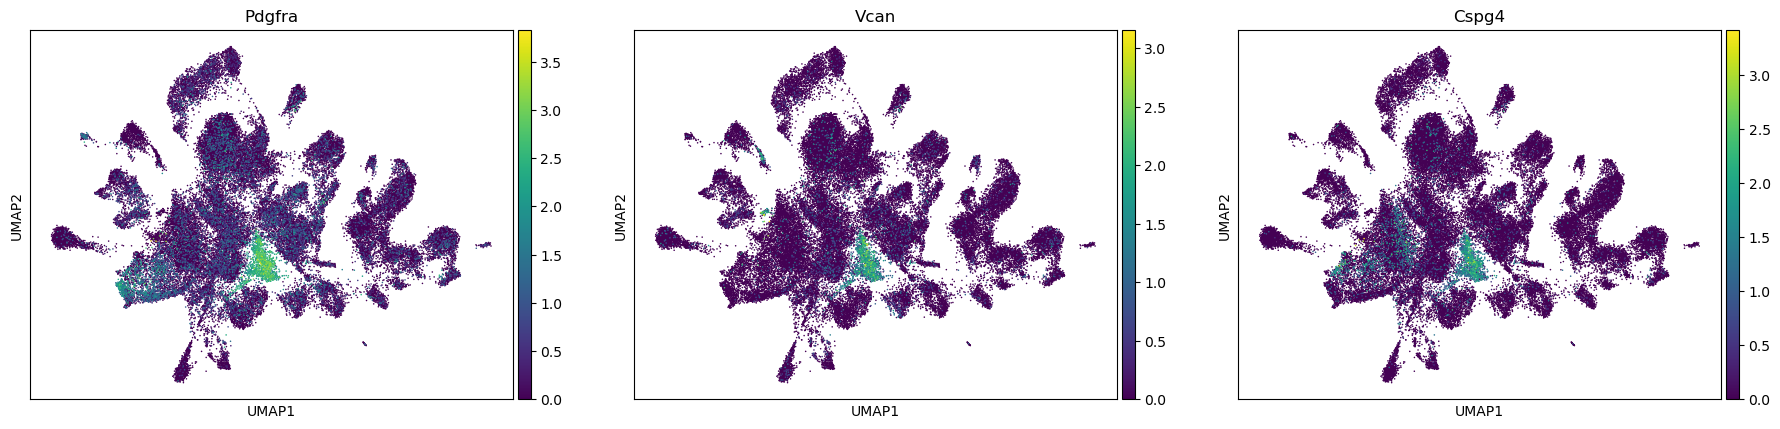

In [23]:
#OPC
sc.pl.umap(adata,
           color=["Pdgfra", "Vcan", "Cspg4"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

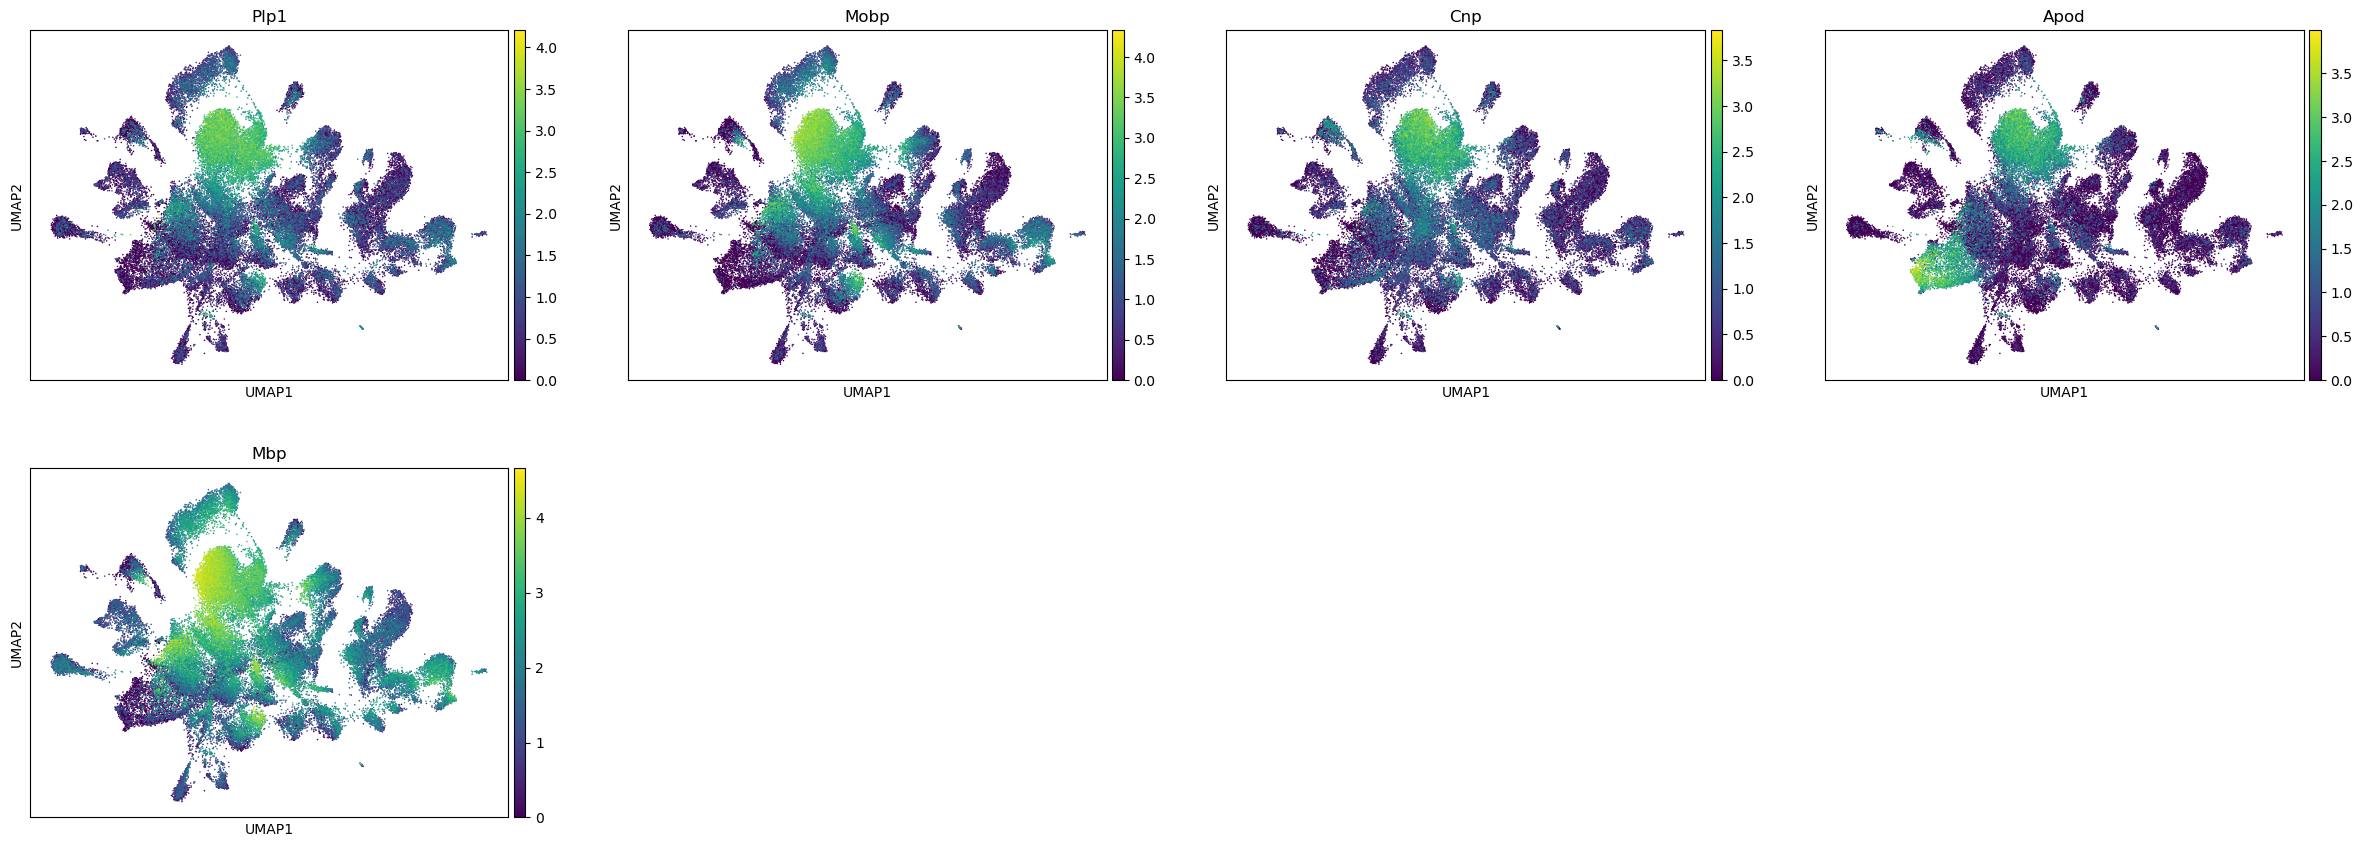

In [24]:
#Oligodendrocytes
sc.pl.umap(adata,
           color=["Plp1", "Mobp", "Cnp", "Apod", "Mbp"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

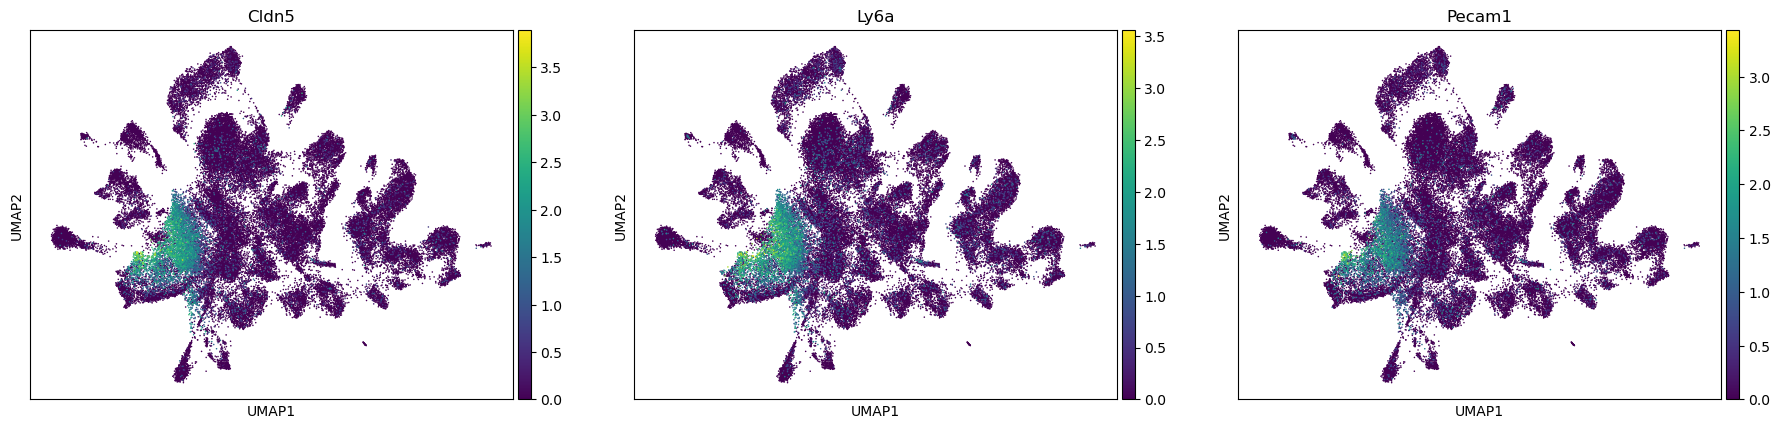

In [25]:
#Perciytes/Endothelial
sc.pl.umap(adata,
           color=["Cldn5", "Ly6a", "Pecam1"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

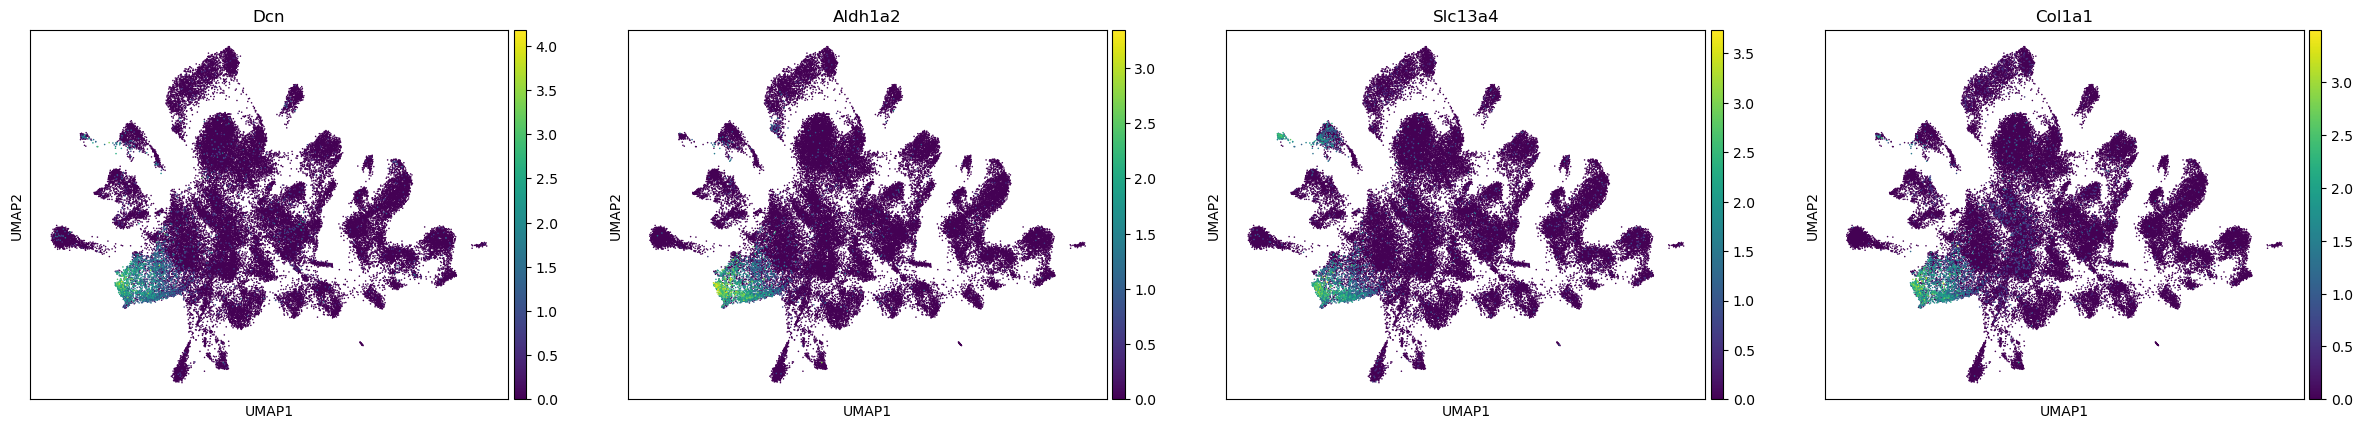

In [26]:
#Fibroblast
sc.pl.umap(adata,
           color=["Dcn", "Aldh1a2", "Slc13a4", "Col1a1"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

In [37]:
labels= {"0":"Oligodendrocytes",
'1':"Perciytes/Endothelial",
'2':"Fibroblast",
'3':"Inhibitory Neurons",
'4':"Excitory Neurons",
'5':"Astrocytes",
'6':"Inhibitory Neurons",
'7':"Excitory Neurons",
'8':"Excitory Neurons",
'9':"Excitory Neurons",
'10':"Astrocytes",
'11':"Oligodendrocytes",
'12':"Inhibitory Neurons",
'13':"Excitory Neurons",
'14':"-",
'15':"Microglia",
'16':"Excitory Neurons",
'17':"Excitory Neurons",
'18':"OPC",
'19':"Astrocytes",
'20':"Astrocytes",
'21':"Excitory Neurons",
'22':"Astrocytes",
'23':"Excitory Neurons",
'24':"Excitory Neurons",
'25':"-",
'26':"Excitory Neurons",
'27':"Excitory Neurons",
'28':"Perciytes/Endothelial",
'29':"Inhibitory Neurons",
'30':"-",
'31':"-",
         '32':"Excitory Neurons", 
        '33':"-"}

In [38]:
# Assign cell type labels to single cells in adata
adata.obs["cell_type"] = adata.obs["leiden"].map(labels)

In [39]:
adata.obs["cell_type"]

aaabfoap-1       Inhibitory Neurons
aaabonpk-1       Inhibitory Neurons
aaadnjke-1                        -
aaaeilha-1    Perciytes/Endothelial
aaaenhoh-1               Fibroblast
                      ...          
oigkoklj-1               Fibroblast
oigloohc-1               Fibroblast
oigmajpm-1               Fibroblast
oignbodm-1               Fibroblast
oignloic-1               Fibroblast
Name: cell_type, Length: 53615, dtype: object

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


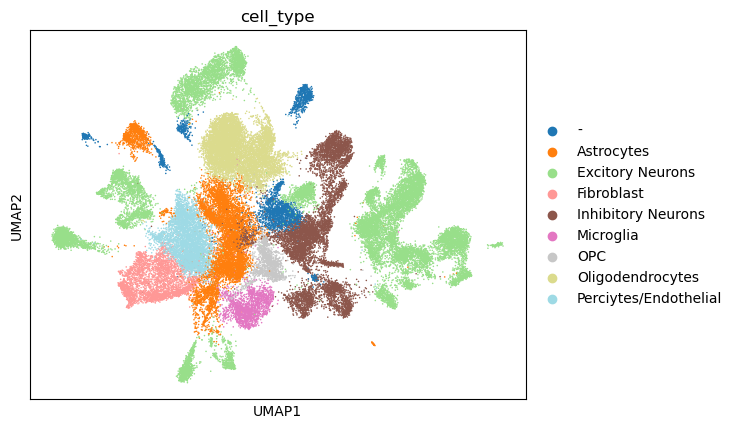

In [40]:
sc.pl.umap(adata,
           color=['cell_type'],
           size=5,
           palette= "tab20")

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Acer\anaconda3\envs\f

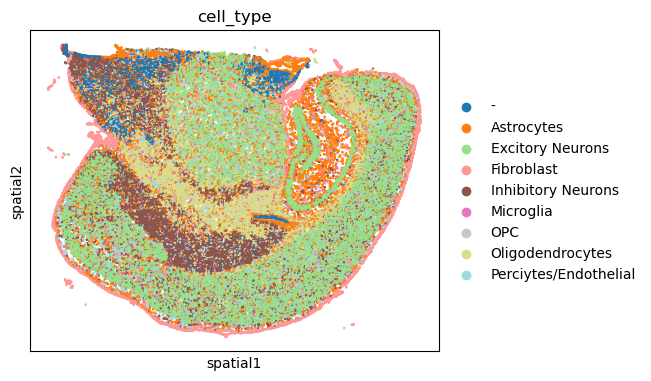

In [56]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=["cell_type"],
    wspace=0.4,
)

In [57]:
adata

AnnData object with n_obs × n_vars = 53615 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'cell_type_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [58]:
adata.write("Xenium_TG_25.h5ad")

In [59]:
adata= sc.read_h5ad("Xenium_TG_25.h5ad")

In [60]:
adata

AnnData object with n_obs × n_vars = 53615 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'cell_type_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'